In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [4]:
from ultralytics import YOLO

In [7]:
!yolo task= detect mode = train model=yolov8n.pt data=/content/drive/MyDrive/data2/data.yaml epochs=100 imgsz=640 batch=32

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/data2/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [8]:
!cp -r runs/ /content/drive/MyDrive/

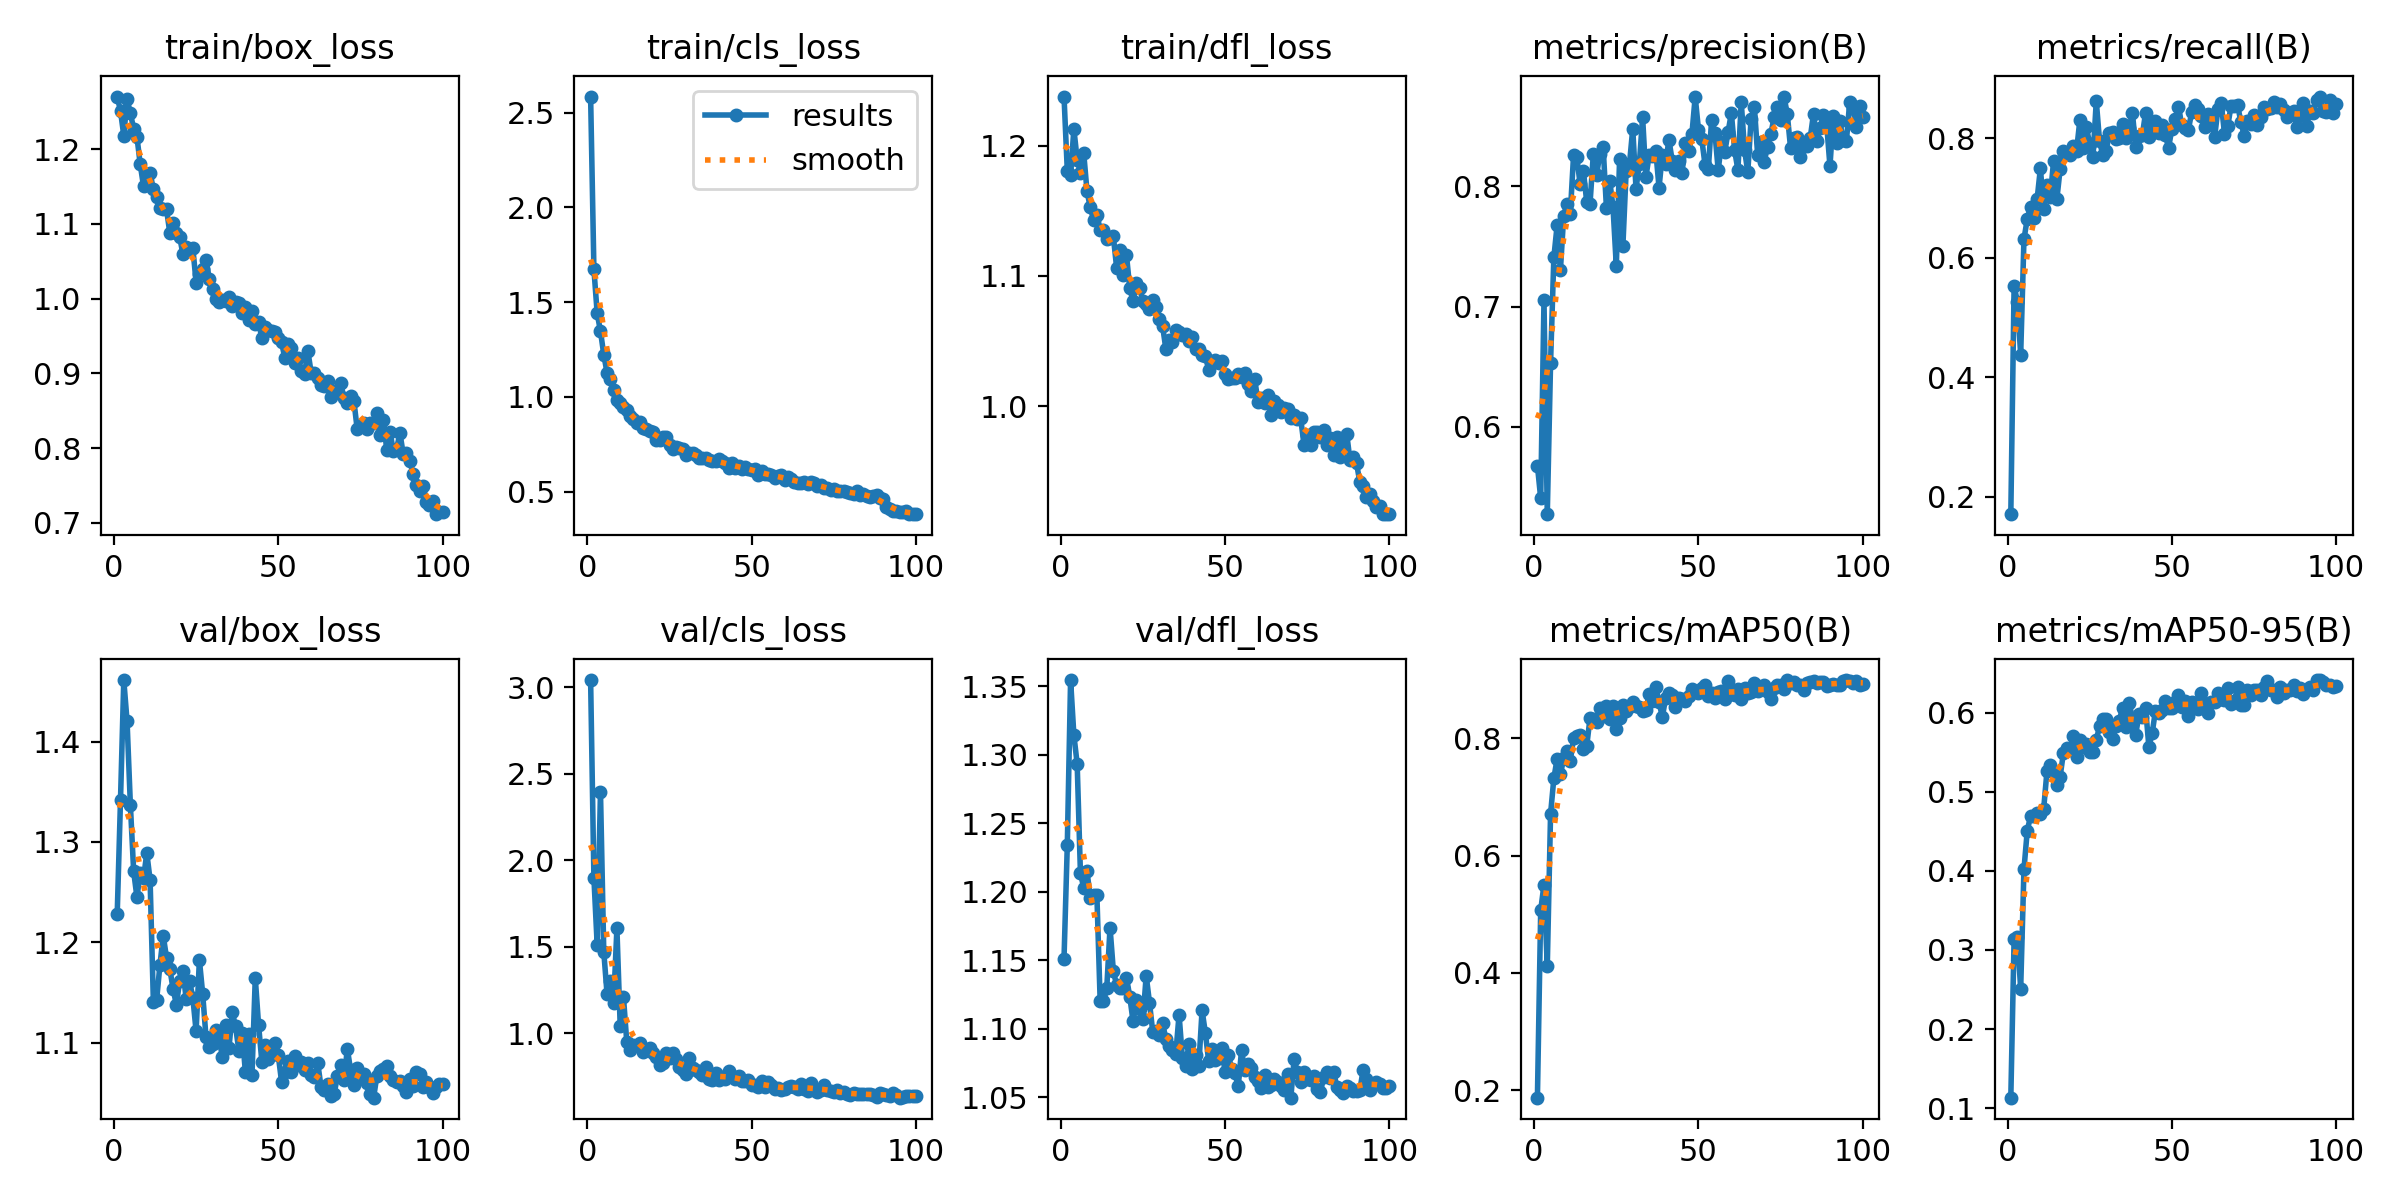

In [9]:

from IPython.display import Image
Image(filename=f'/content/runs/detect/train3/results.png' )

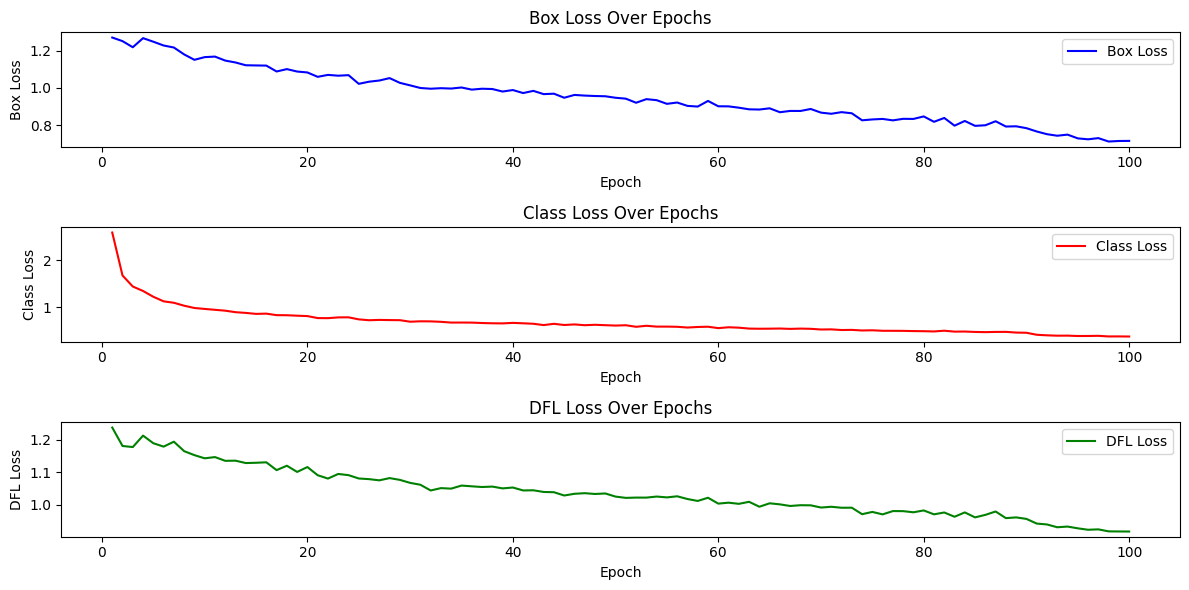

In [10]:
import os
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

log_dir = '/content/runs/detect/train3'


event_acc = event_accumulator.EventAccumulator(log_dir)
event_acc.Reload()

epochs = []
box_loss = []
cls_loss = []
dfl_loss = []

for event in event_acc.Scalars('train/box_loss'):
    epochs.append(event.step)
    box_loss.append(event.value)

for event in event_acc.Scalars('train/cls_loss'):
    cls_loss.append(event.value)

for event in event_acc.Scalars('train/dfl_loss'):
    dfl_loss.append(event.value)

#metrics
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(epochs, box_loss, label='Box Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.title('Box Loss Over Epochs')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(epochs, cls_loss, label='Class Loss', color='r')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.title('Class Loss Over Epochs')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(epochs, dfl_loss, label='DFL Loss', color='g')
plt.xlabel('Epoch')
plt.ylabel('DFL Loss')
plt.title('DFL Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


